Implementation of KMeans clustering algorithm

Import the necessary packages like numpy,pandas,matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Load the dataset using pandas package

In [2]:
dataset = pd.read_csv("Iris Dataset.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


check the size of dataset

In [3]:
dataset.shape

(150, 6)

check for null values in the dataset

In [4]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

check for datatype of the dataset

In [5]:
dataset.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Now convert the object type of Species(feature) to integer type

In [7]:
dataset['Species'].value_counts()
varlist=['Species']
def binary_map(x):
    return x.map({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
dataset[varlist]=dataset[varlist].apply(binary_map)
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


Now describe the dataset

In [8]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,2.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,1.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,1.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,2.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,3.000000


Creating a Kmeans model without using any pre-defined libraries

Sum of Squared Errors: 78.94506582597731
Silhouette Coefficient: 0.759165265236615
Cluster centroids:
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]]


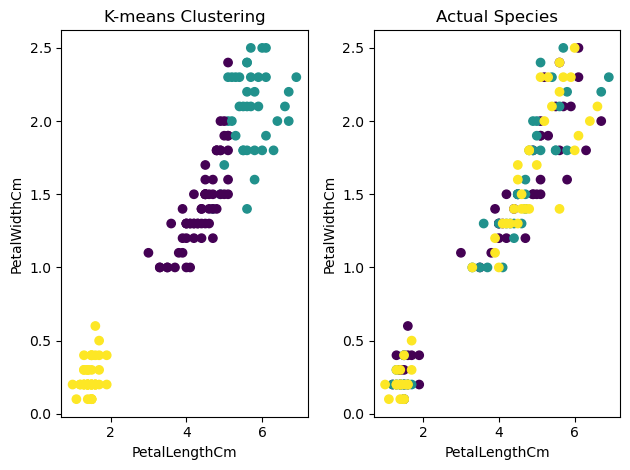

Cluster centroids:
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]]


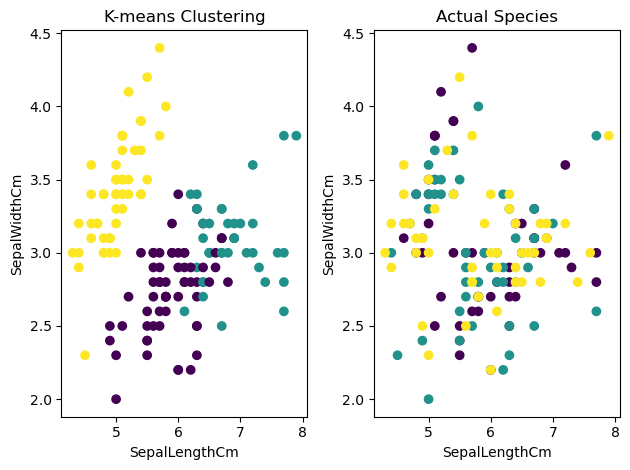

In [24]:
def kmeans_clustering(dataset):
    
    # remove Id column from the dataset
    dataset = dataset.drop(['Id'],axis=1)
    
    #defining the X,y values
    X = dataset.iloc[:,:-1].values # x contains features
    y = dataset.iloc[:, -1].values #y contains target variable Species

    #creating class of KMeans in order to build a model
    class KMeans:
        def __init__(self, k, max_iters=100):
            self.k = k
            self.max_iters = max_iters

         # intializing centroids
        
        def initialize_centroids(self, X):
            np.random.shuffle(X)
            centroids = X[:self.k]
            return centroids
        
        #determining clusters
        
        def assign_clusters(self, X, centroids):
            distances = np.sqrt(np.sum((X[:, np.newaxis] - centroids) ** 2, axis=2))
            cluster_labels = np.argmin(distances, axis=1)
            return cluster_labels

        def update_centroids(self, X, cluster_labels):
            centroids = np.array([X[cluster_labels == k].mean(axis=0) for k in range(self.k)])
            return centroids
        
        #fitting the values into the model
        
        def fit(self, X):
            centroids = self.initialize_centroids(X)

            for _ in range(self.max_iters):
                prev_centroids = centroids.copy()

                cluster_labels = self.assign_clusters(X, centroids)
                centroids = self.update_centroids(X, cluster_labels)

                if np.all(prev_centroids == centroids):
                    break

            self.centroids = centroids
            self.cluster_labels = cluster_labels

        def predict(self, X):
            distances = np.sqrt(np.sum((X[:, np.newaxis] - self.centroids) ** 2, axis=2))
            cluster_labels = np.argmin(distances, axis=1)
            return cluster_labels
        
    
    #assigning 3 clusters into the KMean model
    kmeans = KMeans(k=3)

    # fit the KMeans model to the data
    kmeans.fit(X)
    predicted_labels = kmeans.predict(X)
    squared_errors = np.sum((X - kmeans.centroids[predicted_labels]) ** 2)
    inertia = np.sum(squared_errors)

    # metrics for KMeans model
    
    distances = np.sqrt(np.sum((X[:, np.newaxis] - kmeans.centroids) ** 2, axis=2))
    min_distances = np.min(distances, axis=1)
    a = np.mean(min_distances[predicted_labels])
    b = np.mean(np.partition(distances, 1, axis=1)[:, 1])
    silhouette_coefficient = (b - a) / np.maximum(a, b)

    # Printing the metrics
    print("Sum of Squared Errors:", inertia)
    print("Silhouette Coefficient:", silhouette_coefficient)
    
    # Plotting the clusters
    plt.subplot(121)
    plt.scatter(X[:, 2], X[:, 3], c=predicted_labels)
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title('K-means Clustering')

    # Plotting the actual species
    plt.subplot(122)
    plt.scatter(X[:, 2], X[:, 3], c=y)
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    plt.title('Actual Species')
    # Printing the cluster centroids
    print("Cluster centroids:")
    print(kmeans.centroids)

    plt.tight_layout()
    plt.show()
    plt.subplot(121)
    plt.scatter(X[:, 0], X[:, 1], c=predicted_labels)
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.title('K-means Clustering')

    # Plotting the actual species
    plt.subplot(122)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel('SepalLengthCm')
    plt.ylabel('SepalWidthCm')
    plt.title('Actual Species')
    # Printing the cluster centroids
    print("Cluster centroids:")
    print(kmeans.centroids)

    plt.tight_layout()
    plt.show()
#calling the function
kmeans_clustering(dataset)
